In [95]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.linalg import lu
from numpy.linalg import cholesky
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 200

In [98]:
def generarMatrizColley(filePath):
    file = open(filePath)
    T, P = map(int, file.readline().split(' '))
    c = 2*np.eye(int(T))
    res = np.array(T)

    b = [1 for _ in range(T)]
    contEquipo = 0
    identificadoresEquipos = {}
    for line in file:
        e1, g1, e2, g2 = map(int, line.split()[1:5])
        if(e1 in identificadoresEquipos):
            e1 = identificadoresEquipos[e1]
        else:
            identificadoresEquipos[e1] = contEquipo
            e1 = contEquipo
            contEquipo += 1
            
        if(e2 in identificadoresEquipos):
            e2 = identificadoresEquipos[e2]
        else:
            identificadoresEquipos[e2] = contEquipo
            e2 = contEquipo
            contEquipo += 1
            
        c[e1-1][e2-1] -= 1
        c[e2-1][e1-1] -= 1
        c[e1-1][e1-1] += 1
        c[e2-1][e2-1] += 1
        if g1 > g2:
            b[e1-1] += 0.5
            b[e2-1] -= 0.5
        else:
            b[e2-1] += 0.5
            b[e1-1] -= 0.5
    return c

def eg(matrix):
    return lu(matrix)[2]

def chol(matrix):
    return cholesky(matrix)

def porcentajeDisperso(matrix):
    return 1.0 - ( np.count_nonzero(matrix) / float(matrix.shape[0]**2) )

def mostrarDatos(inputPath):
    x = generarMatrizColley(inputPath)
    plt.subplot(1, 3, 1)
    plt.title(f"Matriz Colley ({round(porcentajeDisperso(x), 2)} sparsity)")
    plt.spy(x)
    xeg = eg(x)
    plt.subplot(1, 3, 2)
    plt.title(f"Matriz luego de EG ({round(porcentajeDisperso(xeg), 2)} sparsity)")
    plt.spy(xeg)
    #xch = chol(x)
    #plt.subplot(1, 3, 3)
    #plt.title(f"Matriz L de Cholesky ({round(porcentajeDisperso(xch), 2)} sparsity)")
    #plt.spy(xch)
    #plt.tight_layout()
    

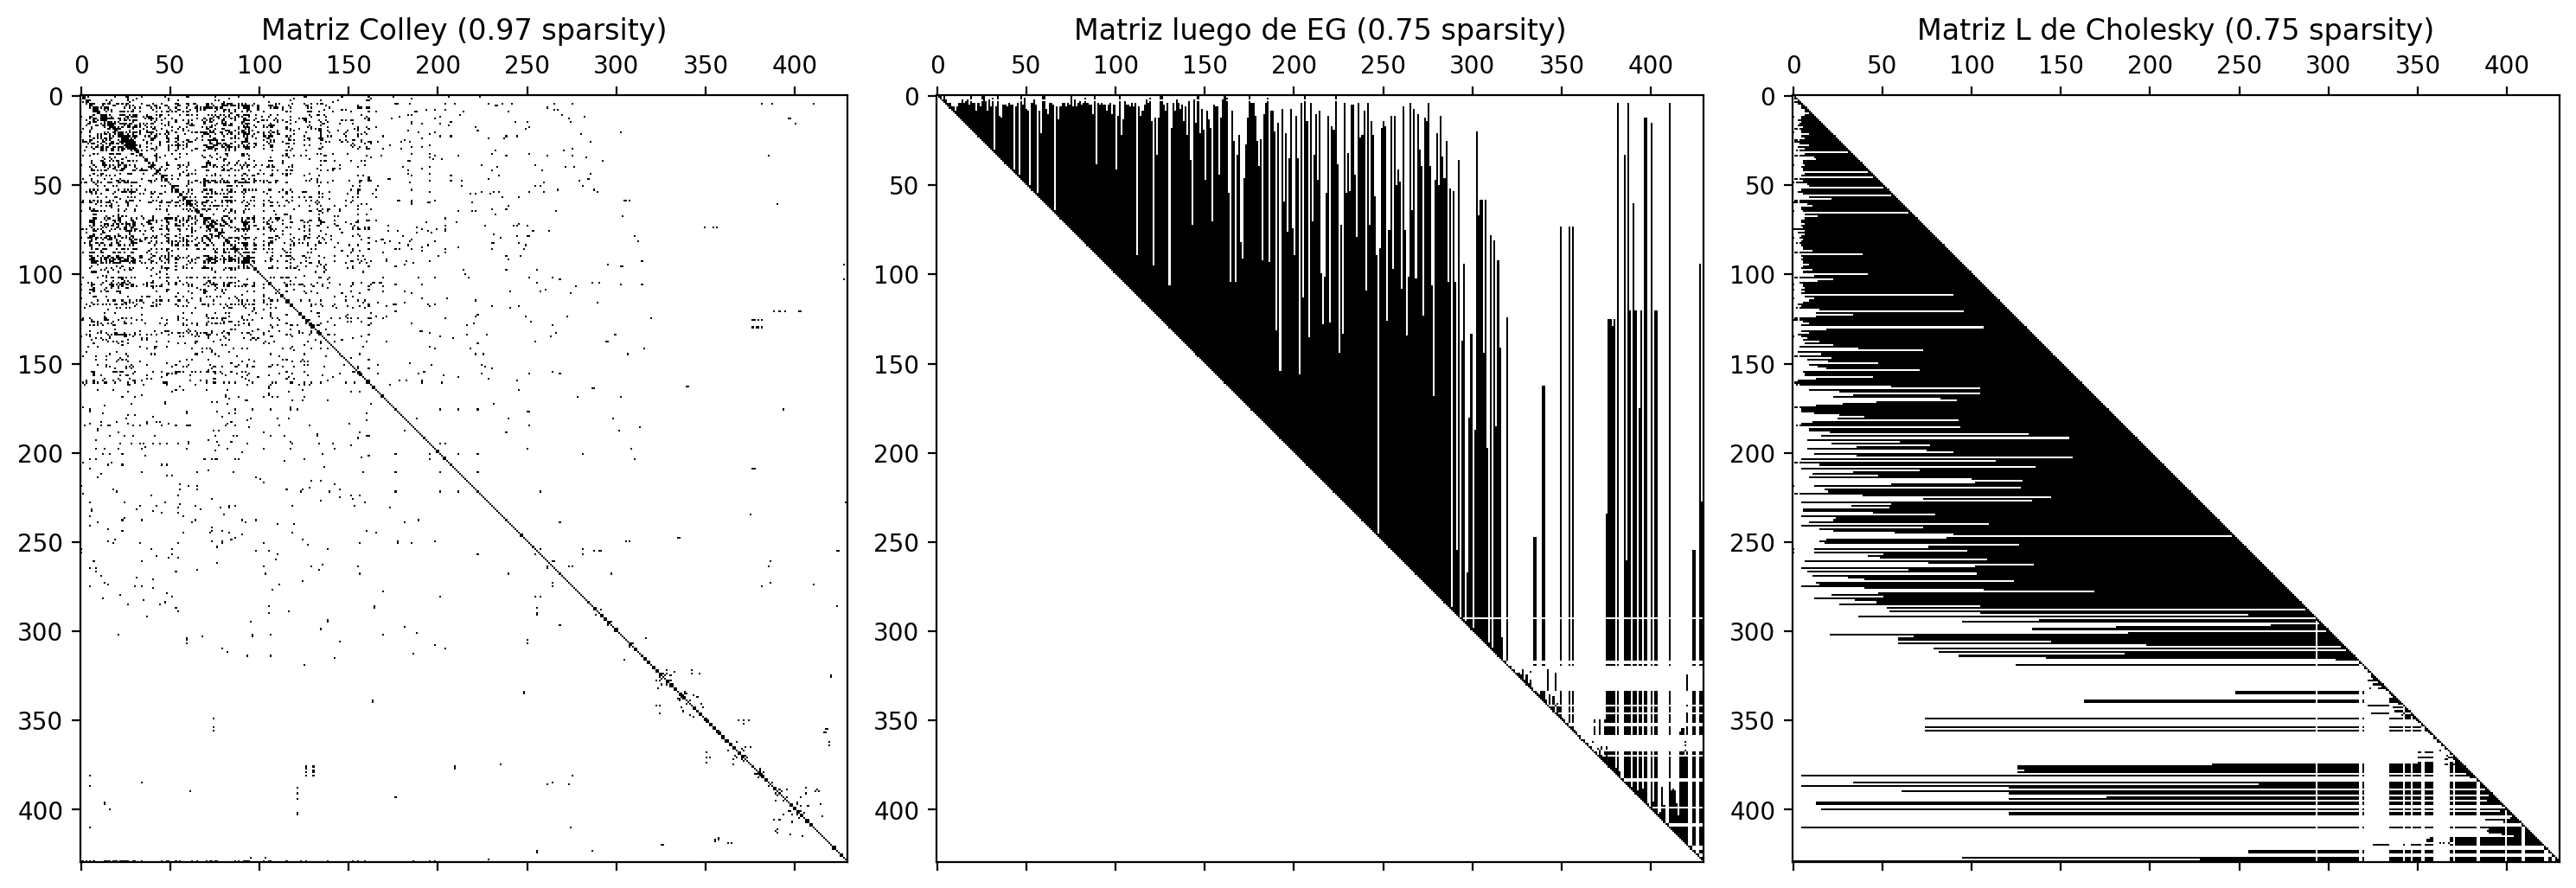

In [97]:
mostrarDatos('sparce_matrix/atp_matches_2015.dat')

## Orden por rating

In [101]:
def ordenarPorRating(inputPath, ratingsPath, outputPath):
    file = open(inputPath)
    fileRatings = open(ratingsPath)
    contEquipo = 0
    identificadoresEquipos = {}
    lines = []
    ratings = []
    ratingsLines = []
    
    for line in fileRatings:
        ratings.append(line)
    
    T, P = map(int, file.readline().split(' '))
    
    for line in file:
        e1, e2 = map(int, [line.split()[1],line.split()[3]])
        if(e1 in identificadoresEquipos):
            e1 = identificadoresEquipos[e1]
        else:
            identificadoresEquipos[e1] = contEquipo
            e1 = contEquipo
            contEquipo += 1
            
        if(e2 in identificadoresEquipos):
            e2 = identificadoresEquipos[e2]
        else:
            identificadoresEquipos[e2] = contEquipo
            e2 = contEquipo
            contEquipo += 1
        lines.append(line)
        ratingsLines.append(ratings[e1])
    
    newLines = [x for _,x in sorted(zip(ratingsLines,lines), reverse=True)] #Devolvemos los equipos ordenados por el ranking
    fileWrite = open(outputPath,'w')
    fileWrite.write(str(T)+" "+str(P)+"\n"+''.join(newLines))
    
ordenarPorRating('sparce_matrix/atp_matches_2015.dat','sparce_matrix/atp_matches_2015_ratings.dat','sparce_matrix/atp_matches_2015_sorted.dat')

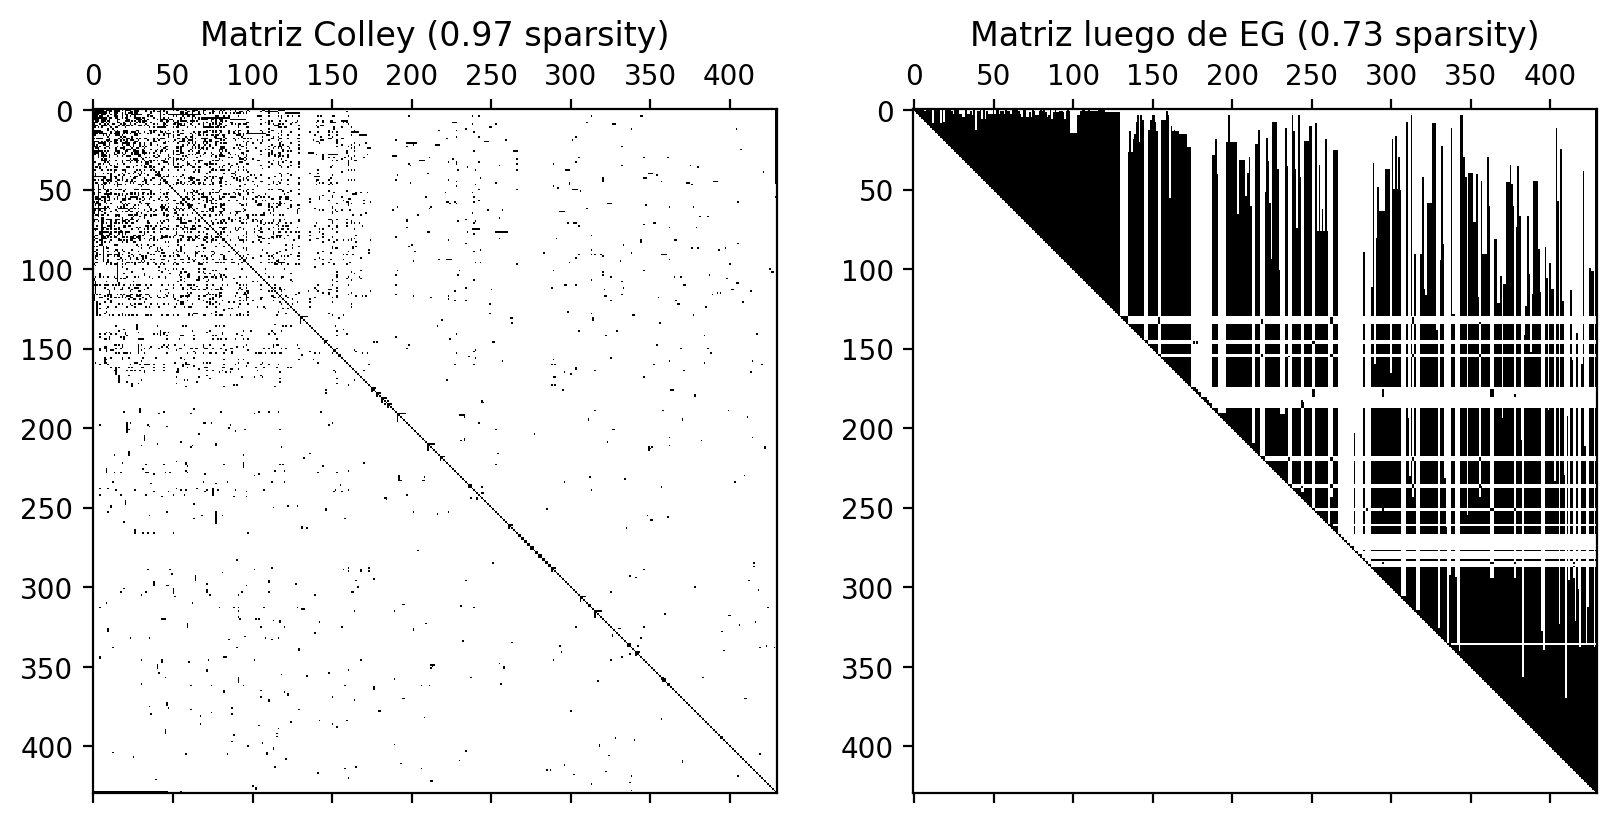

In [102]:
mostrarDatos('sparce_matrix/atp_matches_2015_sorted.dat')

## Orden Random

In [103]:
from random import shuffle
def ordenarRandom(inputPath, outputPath):
    file = open(inputPath)
    lines = []
    
    T, P = map(int, file.readline().split(' '))
    
    for line in file:
        lines.append(line)
        
    shuffle(lines)
    fileWrite = open(outputPath,'w')
    fileWrite.write(str(T)+" "+str(P)+"\n"+''.join(lines))
    
ordenarRandom('sparce_matrix/atp_matches_2015.dat','sparce_matrix/atp_matches_2015_random.dat')

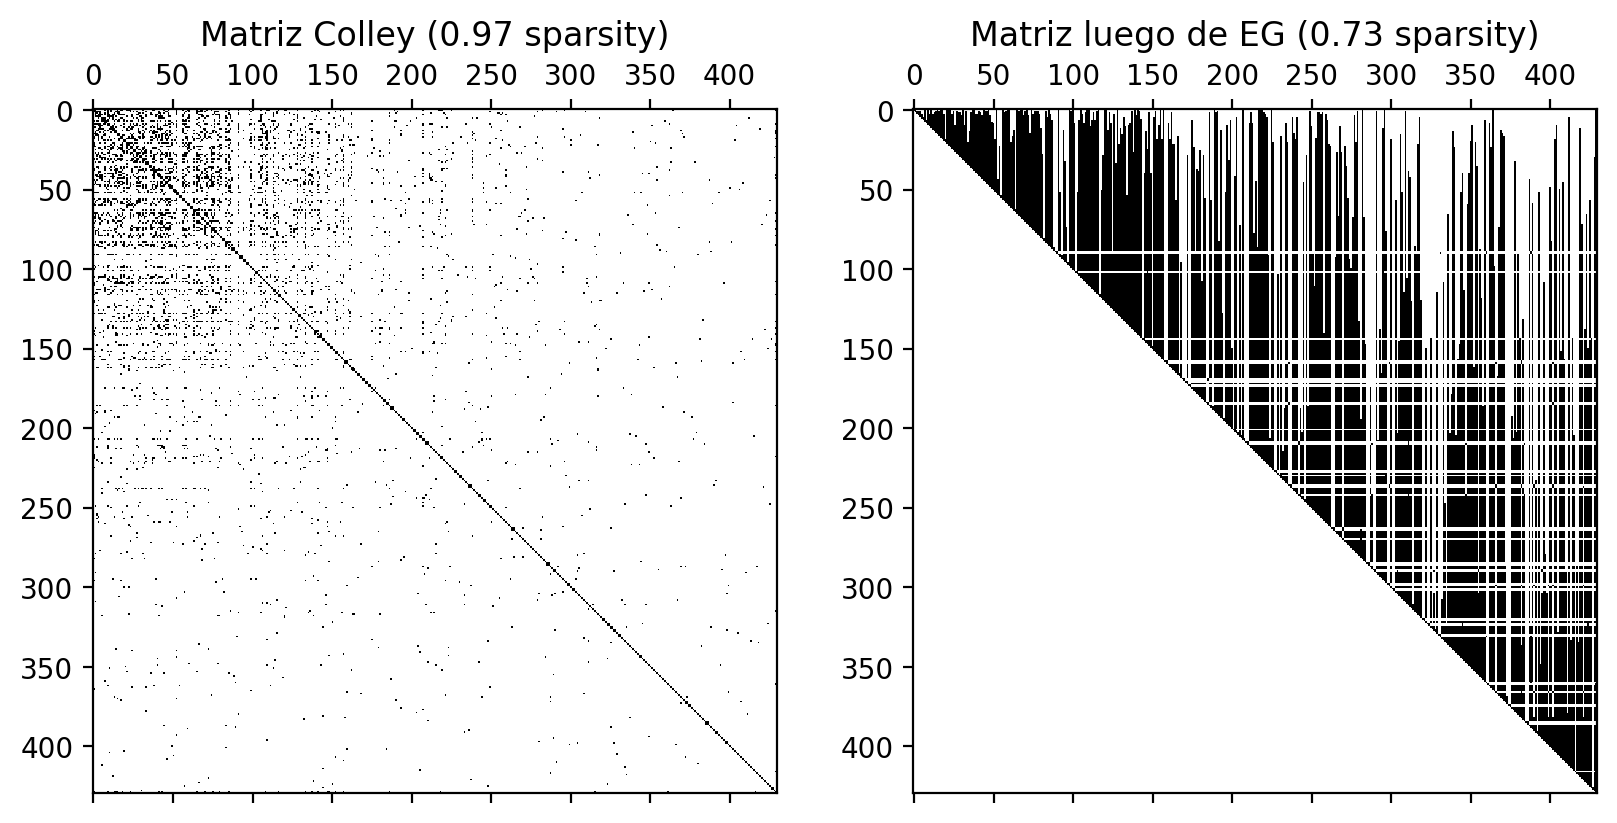

In [104]:
mostrarDatos('sparce_matrix/atp_matches_2015_random.dat')

## Diferencias entre porcentajes de esparcidas con 1000 samples

In [4]:
from random import shuffle
def muchoRandom():
    porcentajeMax = 0
    porcentajeMin = 1
    for x in range(1000):
        file = open('sparce_matrix/atp_matches_2015.dat')
        lines = []

        T, P = map(int, file.readline().split(' '))

        for line in file:
            lines.append(line)

        shuffle(lines)
        fileWrite = open('sparce_matrix/atp_matches_2015_random.dat','w')
        fileWrite.write(str(T)+" "+str(P)+"\n"+''.join(lines))
        
        x = generarMatrizColley('sparce_matrix/atp_matches_2015_random.dat')
        xeg = eg(x)
        porcentajeMax = max(porcentajeMax, porcentajeDisperso(xeg))
        porcentajeMin = min(porcentajeMin, porcentajeDisperso(xeg))
        
    return porcentajeMax, porcentajeMin
    
muchoRandom()

(0.7624553812871823, 0.7111790156841535)

In [105]:
def ordenarPorRating(inputPath, outputPath):
    file = open(inputPath)
    contEquipo = 0
    identificadoresEquipos = {}
    lines = []
    
    T, P = map(int, file.readline().split(' '))
    cantPartidos = [0]*T
    ratingsLines = []
    
    cantPartidos
    for line in file:
        e1, e2 = map(int, [line.split()[1],line.split()[3]])
        if(e1 in identificadoresEquipos):
            e1 = identificadoresEquipos[e1]
        else:
            identificadoresEquipos[e1] = contEquipo
            e1 = contEquipo
            contEquipo += 1
            
        if(e2 in identificadoresEquipos):
            e2 = identificadoresEquipos[e2]
        else:
            identificadoresEquipos[e2] = contEquipo
            e2 = contEquipo
            contEquipo += 1
            
        cantPartidos[e1] += 1
        cantPartidos[e2] += 1
        lines.append(line)
        
    for line in lines:
        e1, e2 = map(int, [line.split()[1],line.split()[3]])
        ratingsLines.append(cantPartidos[identificadoresEquipos[e1]])
    
    newLines = [x for _,x in sorted(zip(ratingsLines,lines), reverse=False)] #Devolvemos los equipos ordenados por el ranking
    fileWrite = open(outputPath,'w')
    fileWrite.write(str(T)+" "+str(P)+"\n"+''.join(newLines))
    
ordenarPorRating('sparce_matrix/atp_matches_2015.dat','sparce_matrix/atp_matches_2015_sorted.dat')

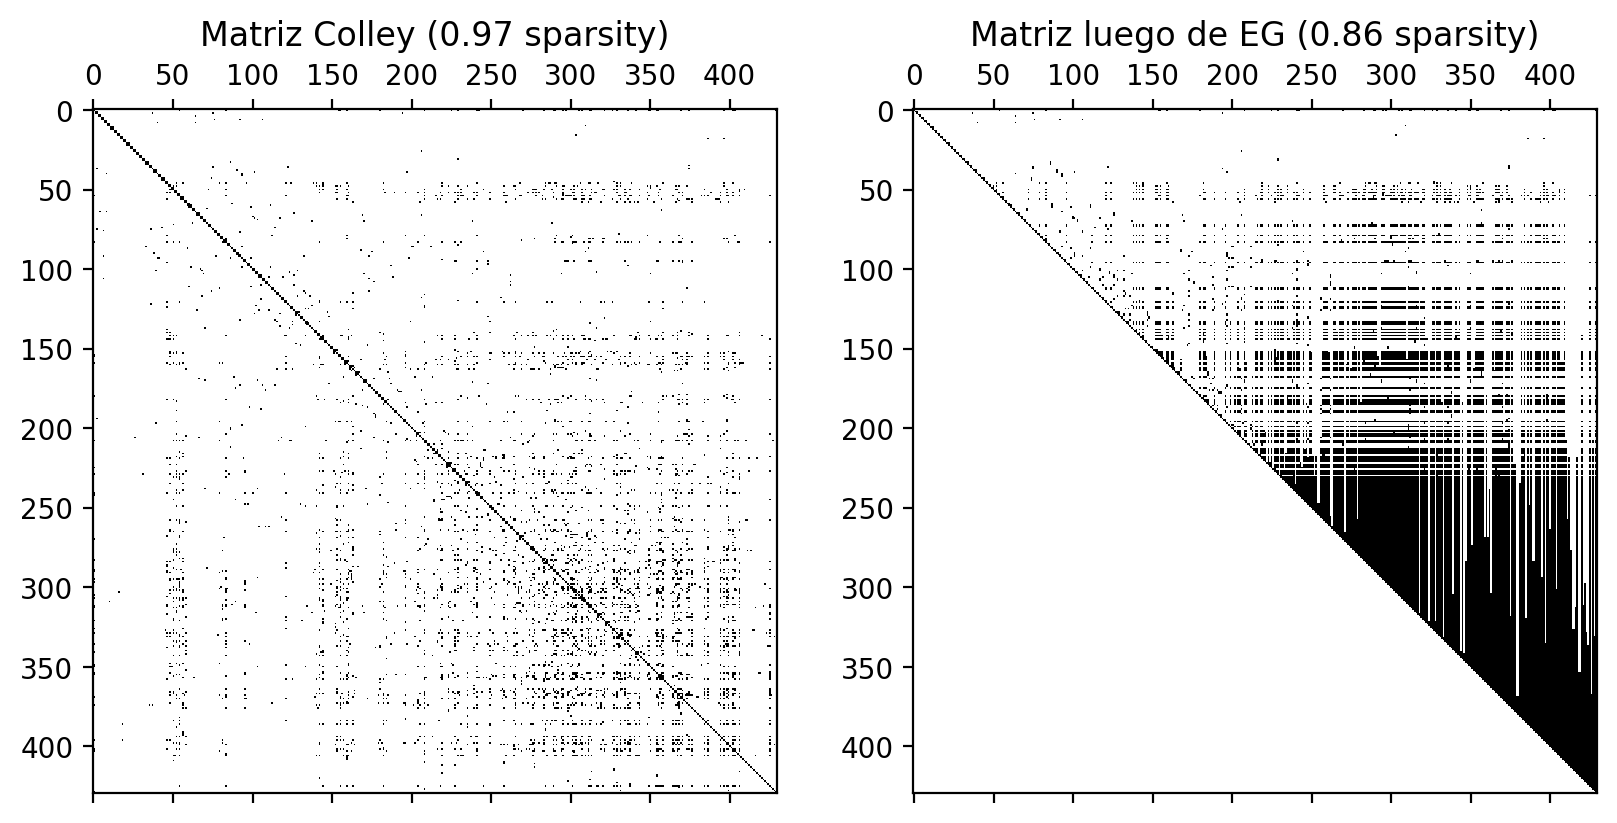

In [106]:
mostrarDatos('sparce_matrix/atp_matches_2015_sorted.dat')